In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data1 = pd.read_csv ("E:/ML course/4- ML/Data/30- classification P. 2/train.csv")      ### Calling Data
data1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df = pd.DataFrame(data1)                    ### making Dataframe
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
# the min amount of two features (px_height & sc_w) did not make sense (are zero!)
# so we should solve them first

In [8]:
### px_height

df[df["px_height"]==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [9]:
df1 = df.drop(index=[1481, 1933])     # incorect value was deleted

In [10]:
### sc_w

df[df["sc_w"]==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,...,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,...,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,...,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,...,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,...,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,...,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,...,64,745,1503,10,0,13,0,0,0,0


In [11]:
### the number of this feature is high and we cannot delete all of them 
# it should be better to replace this amount with minimum amount of screen width of mobiles which is 2.54 cm

df1["sc_w"][df1["sc_w"] < 2.54] = 2.54

In [12]:
df1.describe()     ## it was solved

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,...,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,1238.391391,0.494995,1.521722,0.510010,4.308809,0.521021,32.057558,0.501902,140.262763,4.519019,...,645.753754,1251.276276,2123.511512,12.308809,6.201852,11.010511,0.761261,0.502503,0.507508,1.499499
std,439.369721,0.500100,0.816240,0.500025,4.343101,0.499683,18.141468,0.288411,35.404007,2.287627,...,443.532906,432.064000,1084.701280,4.213652,3.892787,5.464813,0.426419,0.500119,0.500069,1.118314
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,1.000000,500.000000,256.000000,5.000000,2.540000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.250000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,284.000000,874.250000,1206.500000,9.000000,2.540000,6.000000,1.000000,0.000000,0.000000,0.250000
50%,1226.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,565.500000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.750000,1632.750000,3063.750000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
df1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7.00,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3.00,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2.54,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8.00,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2.54,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4.00,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10.00,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,2.54,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10.00,19,1,1,1,0


In [14]:
df1.isnull().sum()           ### no missing value

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
df1.nunique()

battery_power    1093
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1136
px_width         1109
ram              1561
sc_h               15
sc_w               17
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [16]:
#####      variable analysis   ##########

In [17]:
# the types of variables:
# binary: blue, dual sim, four g, n cores, three g, touch screen, wifi  ..................................................
# Ordinal: price range 
# continuous: battery power, clock speed, m dep, mobile wt, px height, px width, ram, sc h, sc w, talk time, int memory, fc, pc 

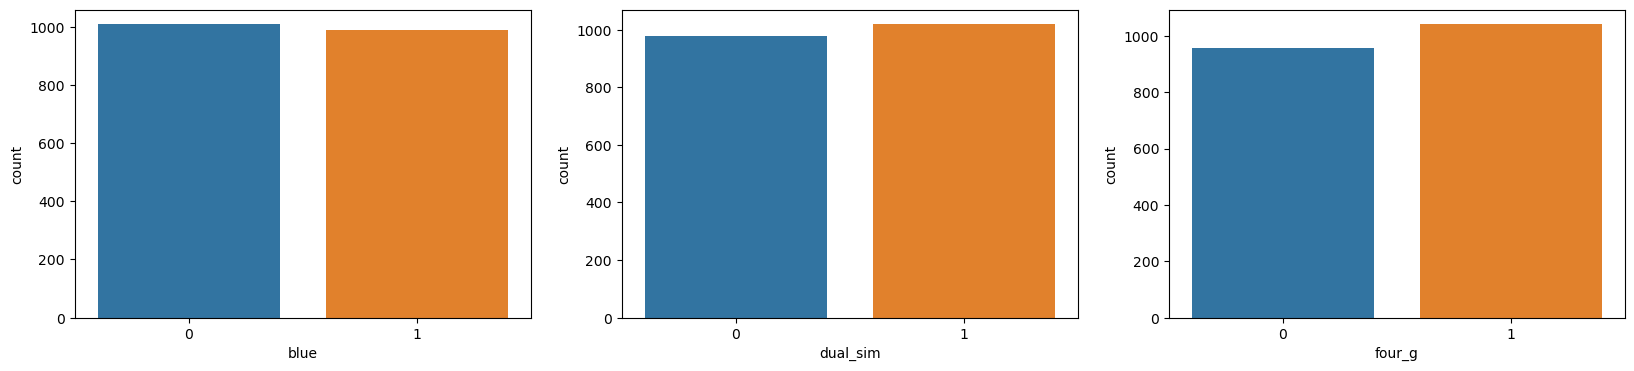

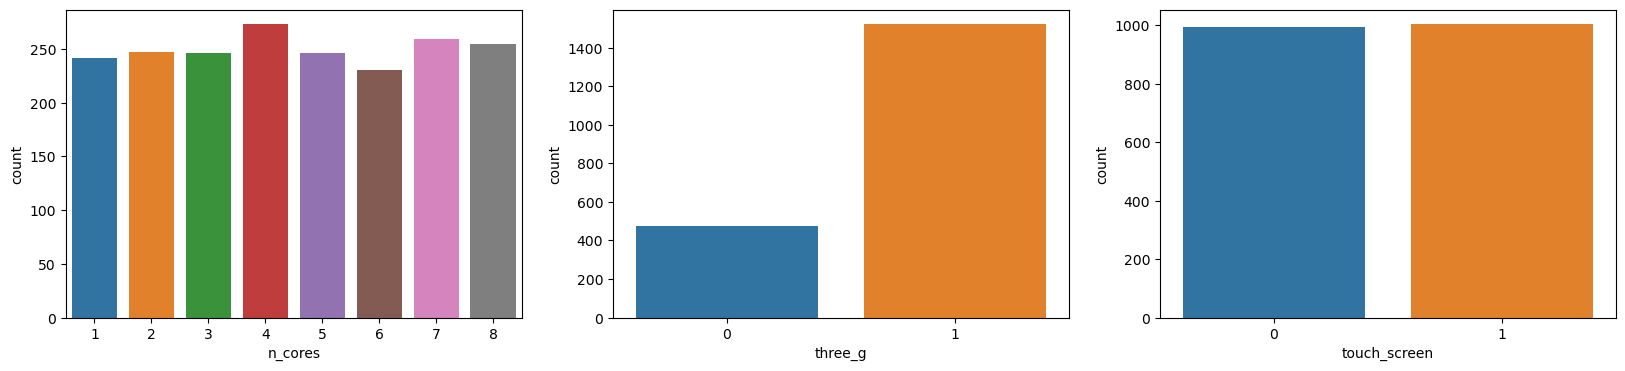

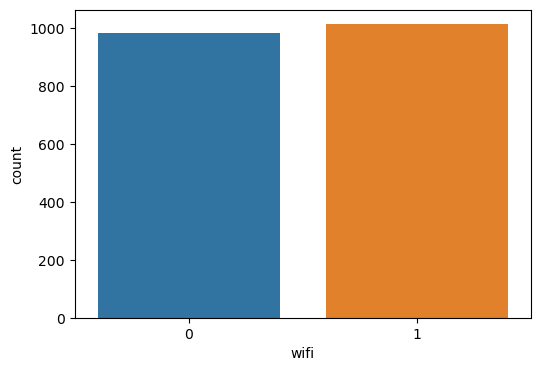

In [18]:
# caategorical features

categorical = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']
i = 0
while i<8:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,3,1)
    sns.countplot(x = categorical[i], data=df1)
    i += 1
    if i ==7:
        break
    plt.subplot(1,3,2)
    sns.countplot(x = categorical[i], data=df1)
    i += 1
    plt.subplot(1,3,3)
    sns.countplot(x = categorical[i], data=df1)
    i += 1
    plt.show()

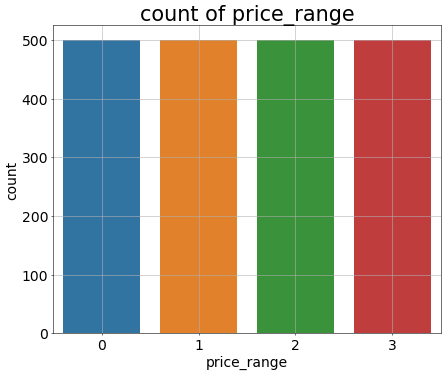

In [19]:
plt.figure(figsize=(10,8),dpi=50)
ax=sns.countplot(x="price_range", data=df1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("price_range", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.title("count of price_range", fontsize=30)
plt.grid()

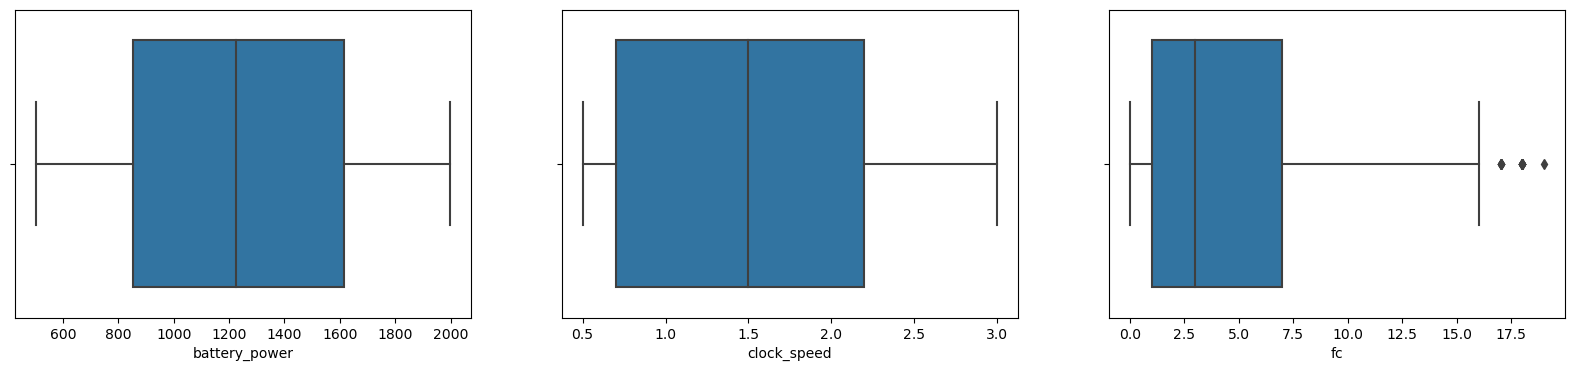

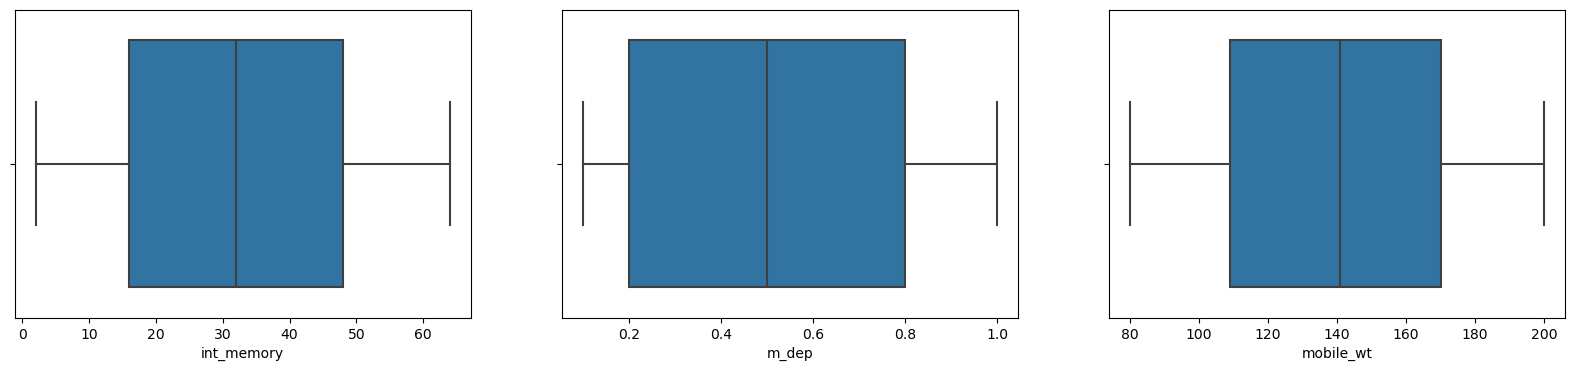

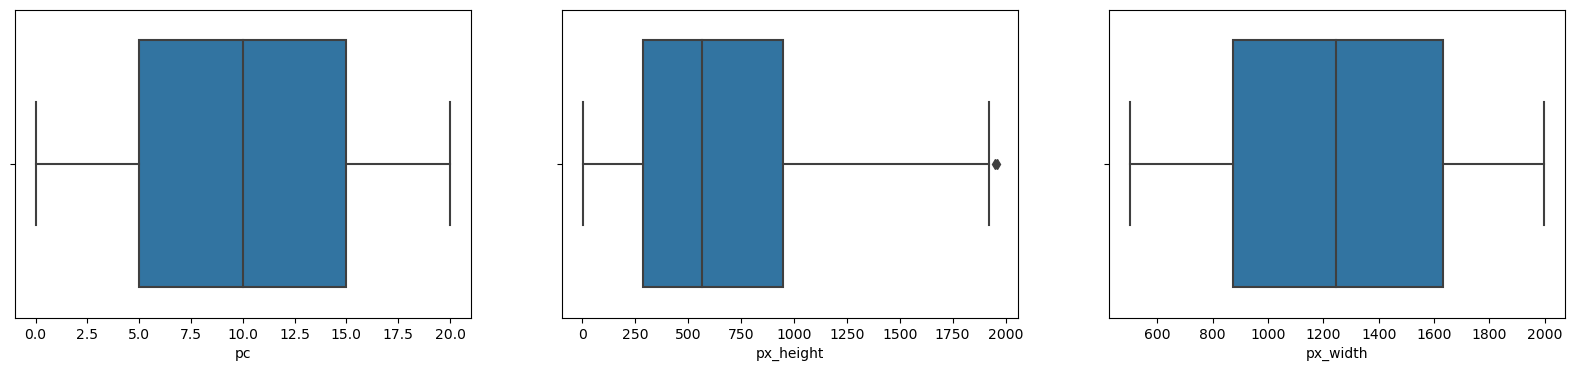

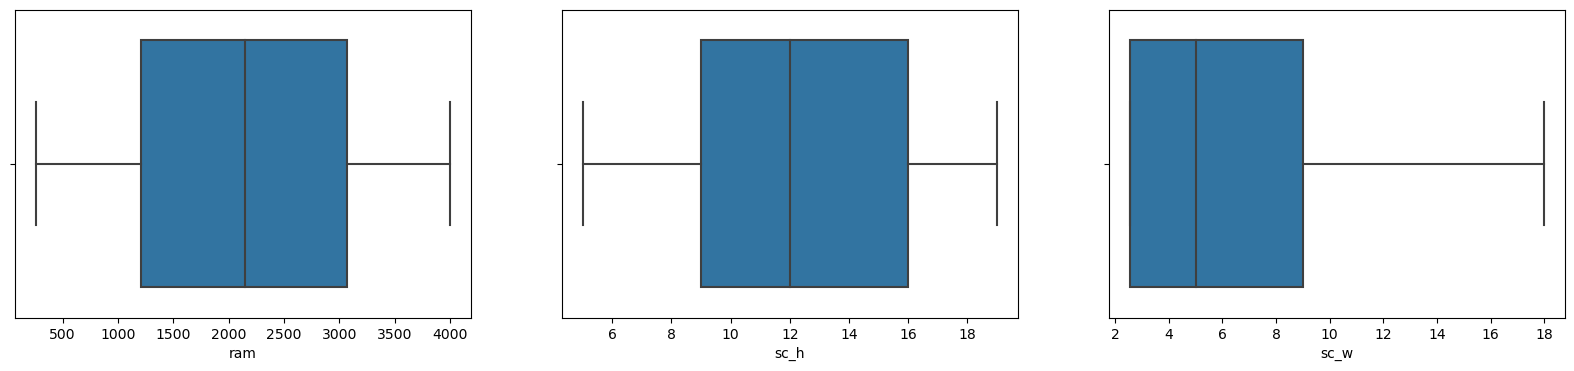

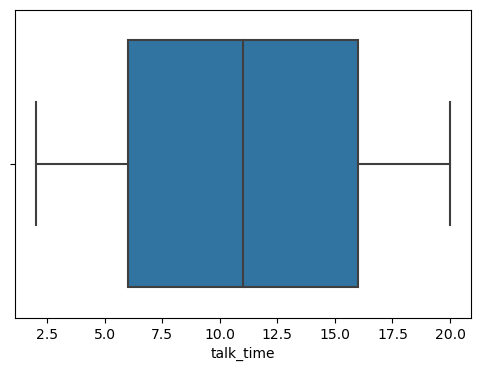

In [20]:
# numerical features

numerical = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','pc', 'px_height','px_width','ram','sc_h','sc_w','talk_time']
i = 0
while i<14:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,3,1)
    sns.boxplot(x = numerical[i], data=df1)
    i += 1
    if i ==13:
        break
    plt.subplot(1,3,2)
    sns.boxplot(x = numerical[i], data=df1)
    i += 1
    plt.subplot(1,3,3)
    sns.boxplot(x = numerical[i], data=df1)
    i += 1

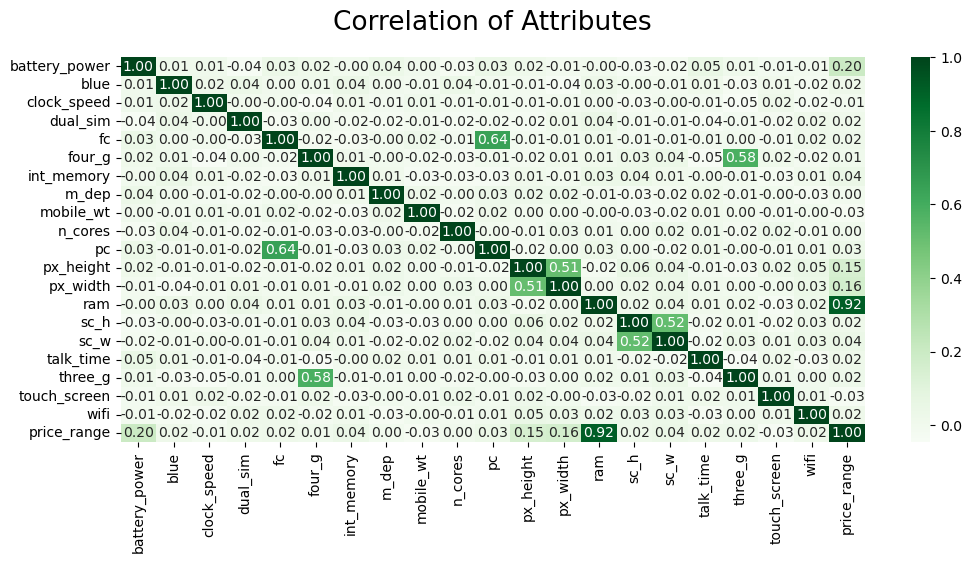

In [21]:
# correlation analysis

plt.figure(figsize = (12,5))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df1.corr(), cmap='Greens',annot=True, fmt='.2f')
plt.show()

In [22]:
### according to the above plot, there is a strong correlation between 'price range' and 'ram'
# in addition 'price range' has correlation with 'batttery power','px width' and 'px height', respectively.
# on the other hand, thre is correlation between 'pc' & 'fc' , '3g' & '4g', 'px height' & 'px width', 'sc h' & 'sc w'.

Text(0.5, 1.0, 'ram Distribution')

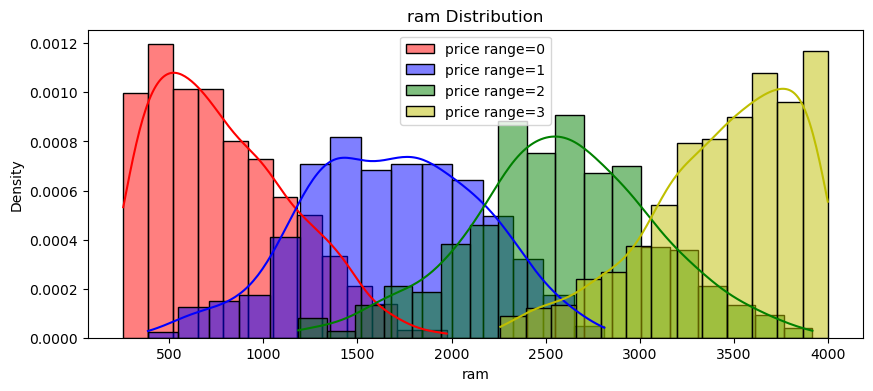

In [23]:
# 'price range' VS 'ram'
# By increasing the value of ram from 256-4000 megabytes, the price range will increase.

plt.figure(figsize=(10,4))
sns.histplot(df1[df1["price_range"] == 0]['ram'], color = 'r',label='price range=0', kde=True, stat="density")
sns.histplot(df1[df1["price_range"] == 1]['ram'], color = 'b',label='price range=1',kde=True, stat="density")
sns.histplot(df1[df1["price_range"] == 2]['ram'], color = 'g',label='price range=2',kde=True, stat="density")
sns.histplot(df1[df1["price_range"] == 3]['ram'], color = 'y',label='price range=3',kde=True, stat="density")
plt.legend()
plt.title("ram Distribution")

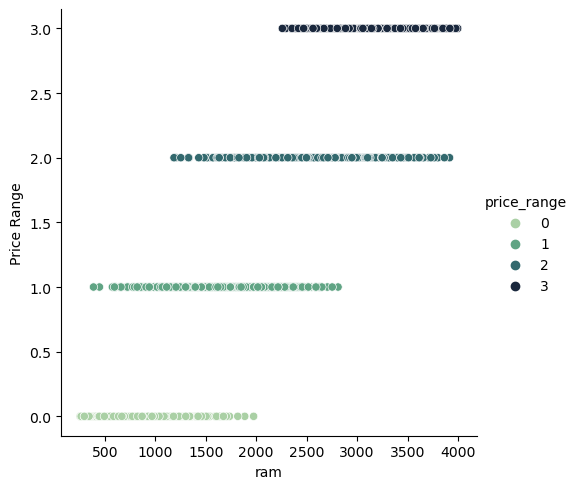

In [24]:
sns.relplot(data=df1, x="ram", y="price_range", hue="price_range", palette="ch:r=-.5, l=.75")
plt.xlabel("ram", fontsize=10)
plt.ylabel("Price Range", fontsize=10)
plt.show()

<Axes: xlabel='ram', ylabel='Density'>

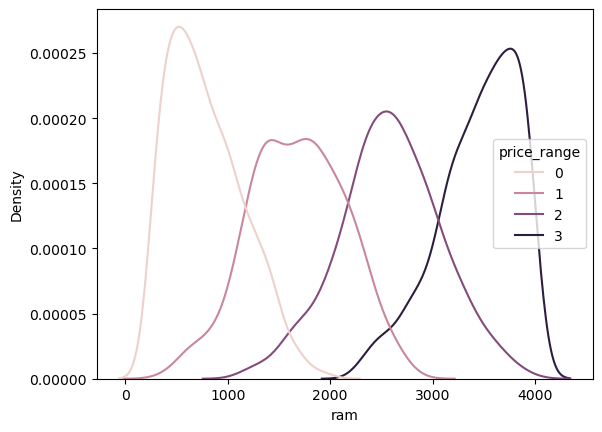

In [25]:
sns.kdeplot(data=df1, x="ram",hue="price_range")

<Axes: xlabel='battery_power', ylabel='Count'>

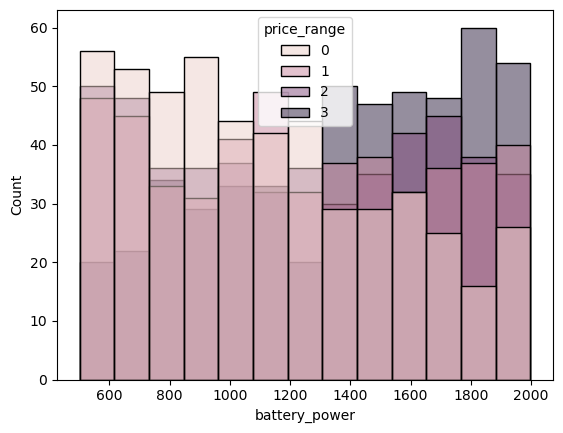

In [26]:
## # 'price range' VS 'battery power'
# mobiles with more strong battery power(more than 1300 mAh) are more expensive.

sns.histplot(df1, x="battery_power", hue = "price_range")

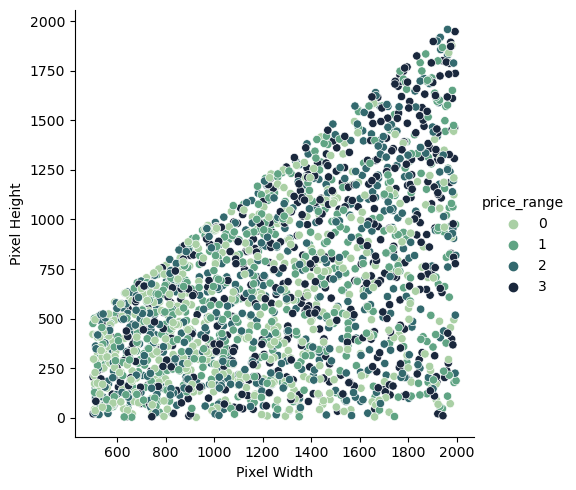

In [27]:
## px width VS px height  and 'price range'
# Display Resolution illustrates by increasing Pixel Height, the Pixel Width will increase.
# also price is going up by increasing in both of them

sns.relplot(data=df1, x="px_width", y="px_height", hue="price_range", palette="ch:r=-.5,l=.75")
plt.xlabel('Pixel Width')
plt.ylabel('Pixel Height')
plt.show()

Text(0.5, 1.0, 'px_height vs price_range')

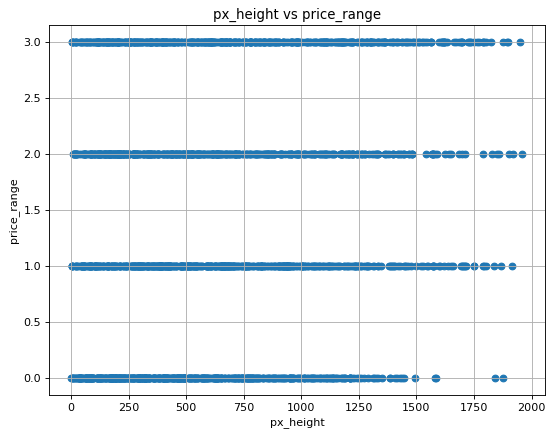

In [28]:
# distribution of height is not normal which shows mobiles with more px height are less

plt.figure(figsize = (8,6), dpi = 80)
plt.grid()
plt.scatter(df1["px_height"], df1["price_range"])
plt.xlabel ("px_height")
plt.ylabel ("price_range")
plt.title('px_height vs price_range')  

Text(0.5, 1.0, 'px_height Distribution')

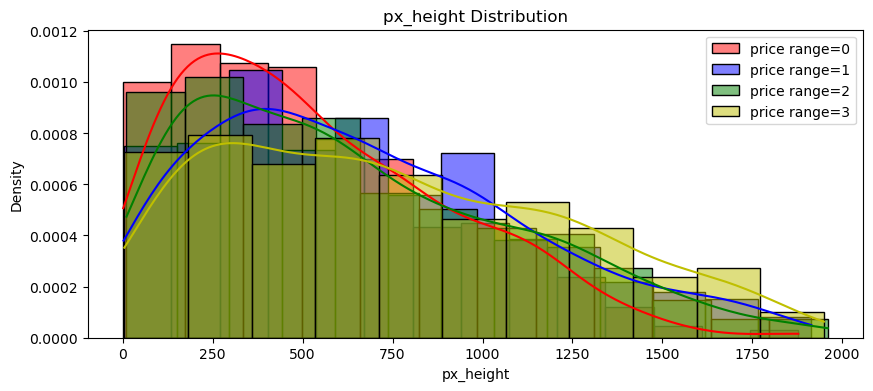

In [29]:
plt.figure(figsize=(10,4))
sns.histplot(df1[df1["price_range"] == 0]['px_height'], color = 'r',label='price range=0', kde=True, stat="density")
sns.histplot(df1[df1["price_range"] == 1]['px_height'], color = 'b',label='price range=1',kde=True, stat="density")
sns.histplot(df1[df1["price_range"] == 2]['px_height'], color = 'g',label='price range=2',kde=True, stat="density")
sns.histplot(df1[df1["price_range"] == 3]['px_height'], color = 'y',label='price range=3',kde=True, stat="density")
plt.legend()
plt.title("px_height Distribution")

Text(0.5, 1.0, 'px_width vs price_range')

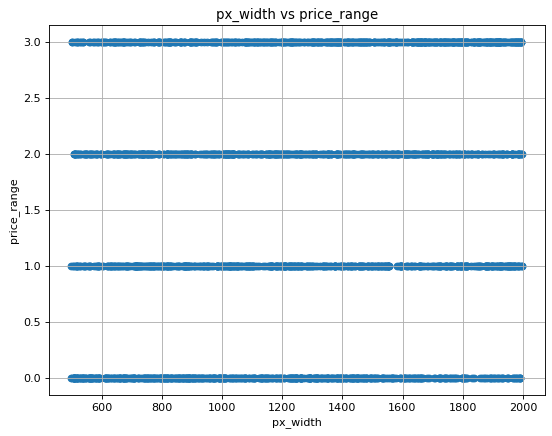

In [30]:
# but distribution of px width is normal

plt.figure(figsize = (8,6), dpi = 80)
plt.grid()
plt.scatter(df1["px_width"], df1["price_range"])
plt.xlabel ("px_width")
plt.ylabel ("price_range")
plt.title('px_width vs price_range')  

Text(0.5, 1.0, 'px_width Distribution')

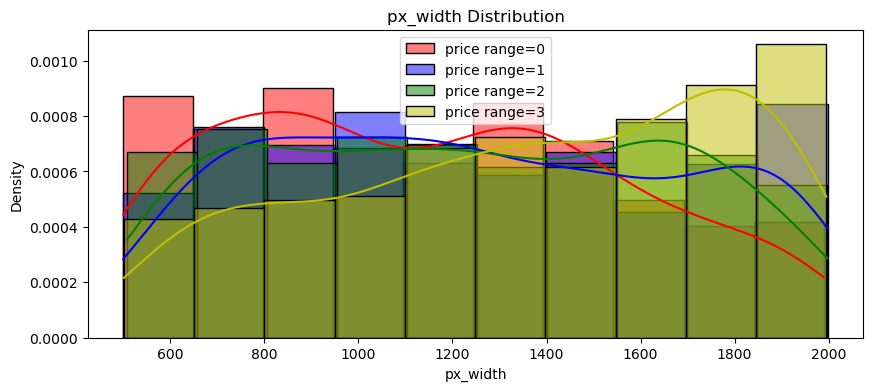

In [31]:
plt.figure(figsize=(10,4))
sns.histplot(df1[df1["price_range"] == 0]['px_width'], color = 'r',label='price range=0', kde=True, stat="density")
sns.histplot(df1[df1["price_range"] == 1]['px_width'], color = 'b',label='price range=1',kde=True, stat="density")
sns.histplot(df1[df1["price_range"] == 2]['px_width'], color = 'g',label='price range=2',kde=True, stat="density")
sns.histplot(df1[df1["price_range"] == 3]['px_width'], color = 'y',label='price range=3',kde=True, stat="density")
plt.legend()
plt.title("px_width Distribution")

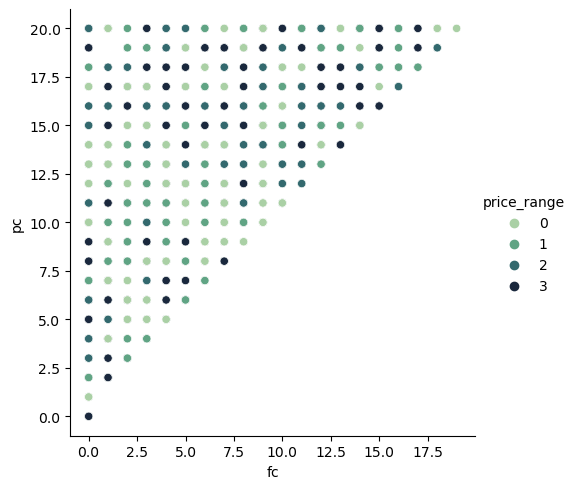

In [32]:
# 'fc' VS 'pc'

sns.relplot(data=df1, x="fc", y="pc", hue="price_range", palette="ch:r=-.5,l=.75")
plt.xlabel('fc')
plt.ylabel('pc')
plt.show()

<Axes: xlabel='three_g', ylabel='four_g'>

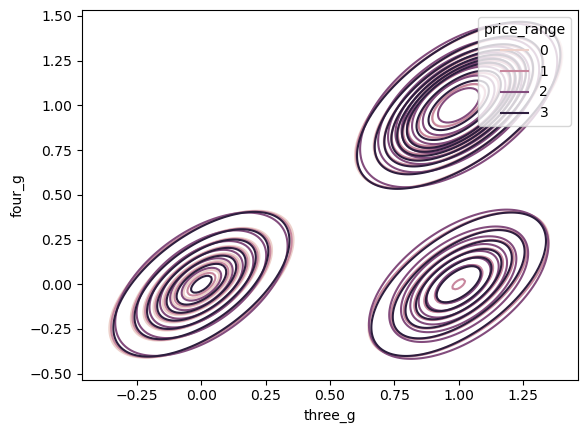

In [33]:
## '3 g' VS '4 g'

sns.kdeplot(data=df1, x="three_g", y="four_g", hue="price_range")

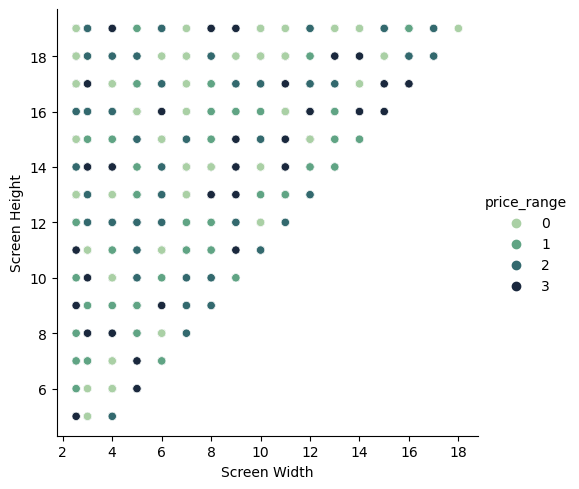

In [34]:
# 'sc w' VS 'sc h'
# Screen Size illustrates by increasing Screen Height, the Screen Width will increase.

sns.relplot(data=df1, x="sc_w", y="sc_h", hue="price_range", palette="ch:r=-.5,l=.75")
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.show()

In [35]:
###         Machine Learning Model    ####

In [36]:
X = pd.DataFrame(df1, columns=['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'])
y = df1['price_range'].values.reshape(-1,1)
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7.00,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3.00,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2.54,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8.00,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2.54,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4.00,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10.00,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,2.54,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10.00,19,1,1,1


In [87]:
### Decision tree   
#  with variable amount for 'test size' and 'max depth' to choose better one


def DT(X,y,Testsize, max_depth):
    df1_evaluation=pd.DataFrame()
    for x in Testsize:
        X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = x , random_state =0)
        for m_depth in max_depth:
            DT = DecisionTreeClassifier(max_depth = m_depth)
            DT.fit(X_train,y_train)
            y_pred = DT.predict (X_test)
            dict={"Test_size":x, "Max_depth":m_depth, "Accuracy":metrics.accuracy_score(y_test, y_pred), "score":DT.score(X,y)}
            df1_evaluation = df1_evaluation.append(dict, ignore_index=True)
    return (df1_evaluation)

def highlight_max(s):
    is_max = s == s.max()
    return ["background-color: yellow" if v else '' for v in is_max]

In [88]:
df1_evaluation = DT(X,y,[.1, .15, .2, .25, .3], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
df1_evaluation.style.apply(highlight_max)

,Test_size,Max_depth,Accuracy,score
0,0.100000,1.000000,0.550000,0.500000
1,0.100000,2.000000,0.735000,0.763764
2,0.100000,3.000000,0.740000,0.769269
3,0.100000,4.000000,0.770000,0.832833
4,0.100000,5.000000,0.815000,0.880380
5,0.100000,6.000000,0.825000,0.911912
6,0.100000,7.000000,0.835000,0.944444
7,0.100000,8.000000,0.835000,0.960961
8,0.100000,9.000000,0.835000,0.974975
9,0.100000,10.000000,0.815000,0.978478


In [89]:
### 'test size' = 0.20 and 'max depth' = 7 is the best accuracy (0.86)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)
DT1 = DecisionTreeClassifier(max_depth=7)
DT1 = DT1.fit(X_train,y_train)
y_pred = DT1.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8625


In [90]:
from sklearn import tree
text_representation = tree.export_text(DT1)
print(text_representation)

|--- feature_13 <= 2309.50
|   |--- feature_13 <= 1106.00
|   |   |--- feature_11 <= 1449.00
|   |   |   |--- feature_0 <= 1609.00
|   |   |   |   |--- feature_13 <= 1052.50
|   |   |   |   |   |--- feature_16 <= 19.50
|   |   |   |   |   |   |--- feature_0 <= 1504.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  1504.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_16 >  19.50
|   |   |   |   |   |   |--- feature_9 <= 2.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_9 >  2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  1052.50
|   |   |   |   |   |--- feature_11 <= 1222.00
|   |   |   |   |   |   |--- feature_7 <= 0.90
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  0.90
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_11 >  1222.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feat

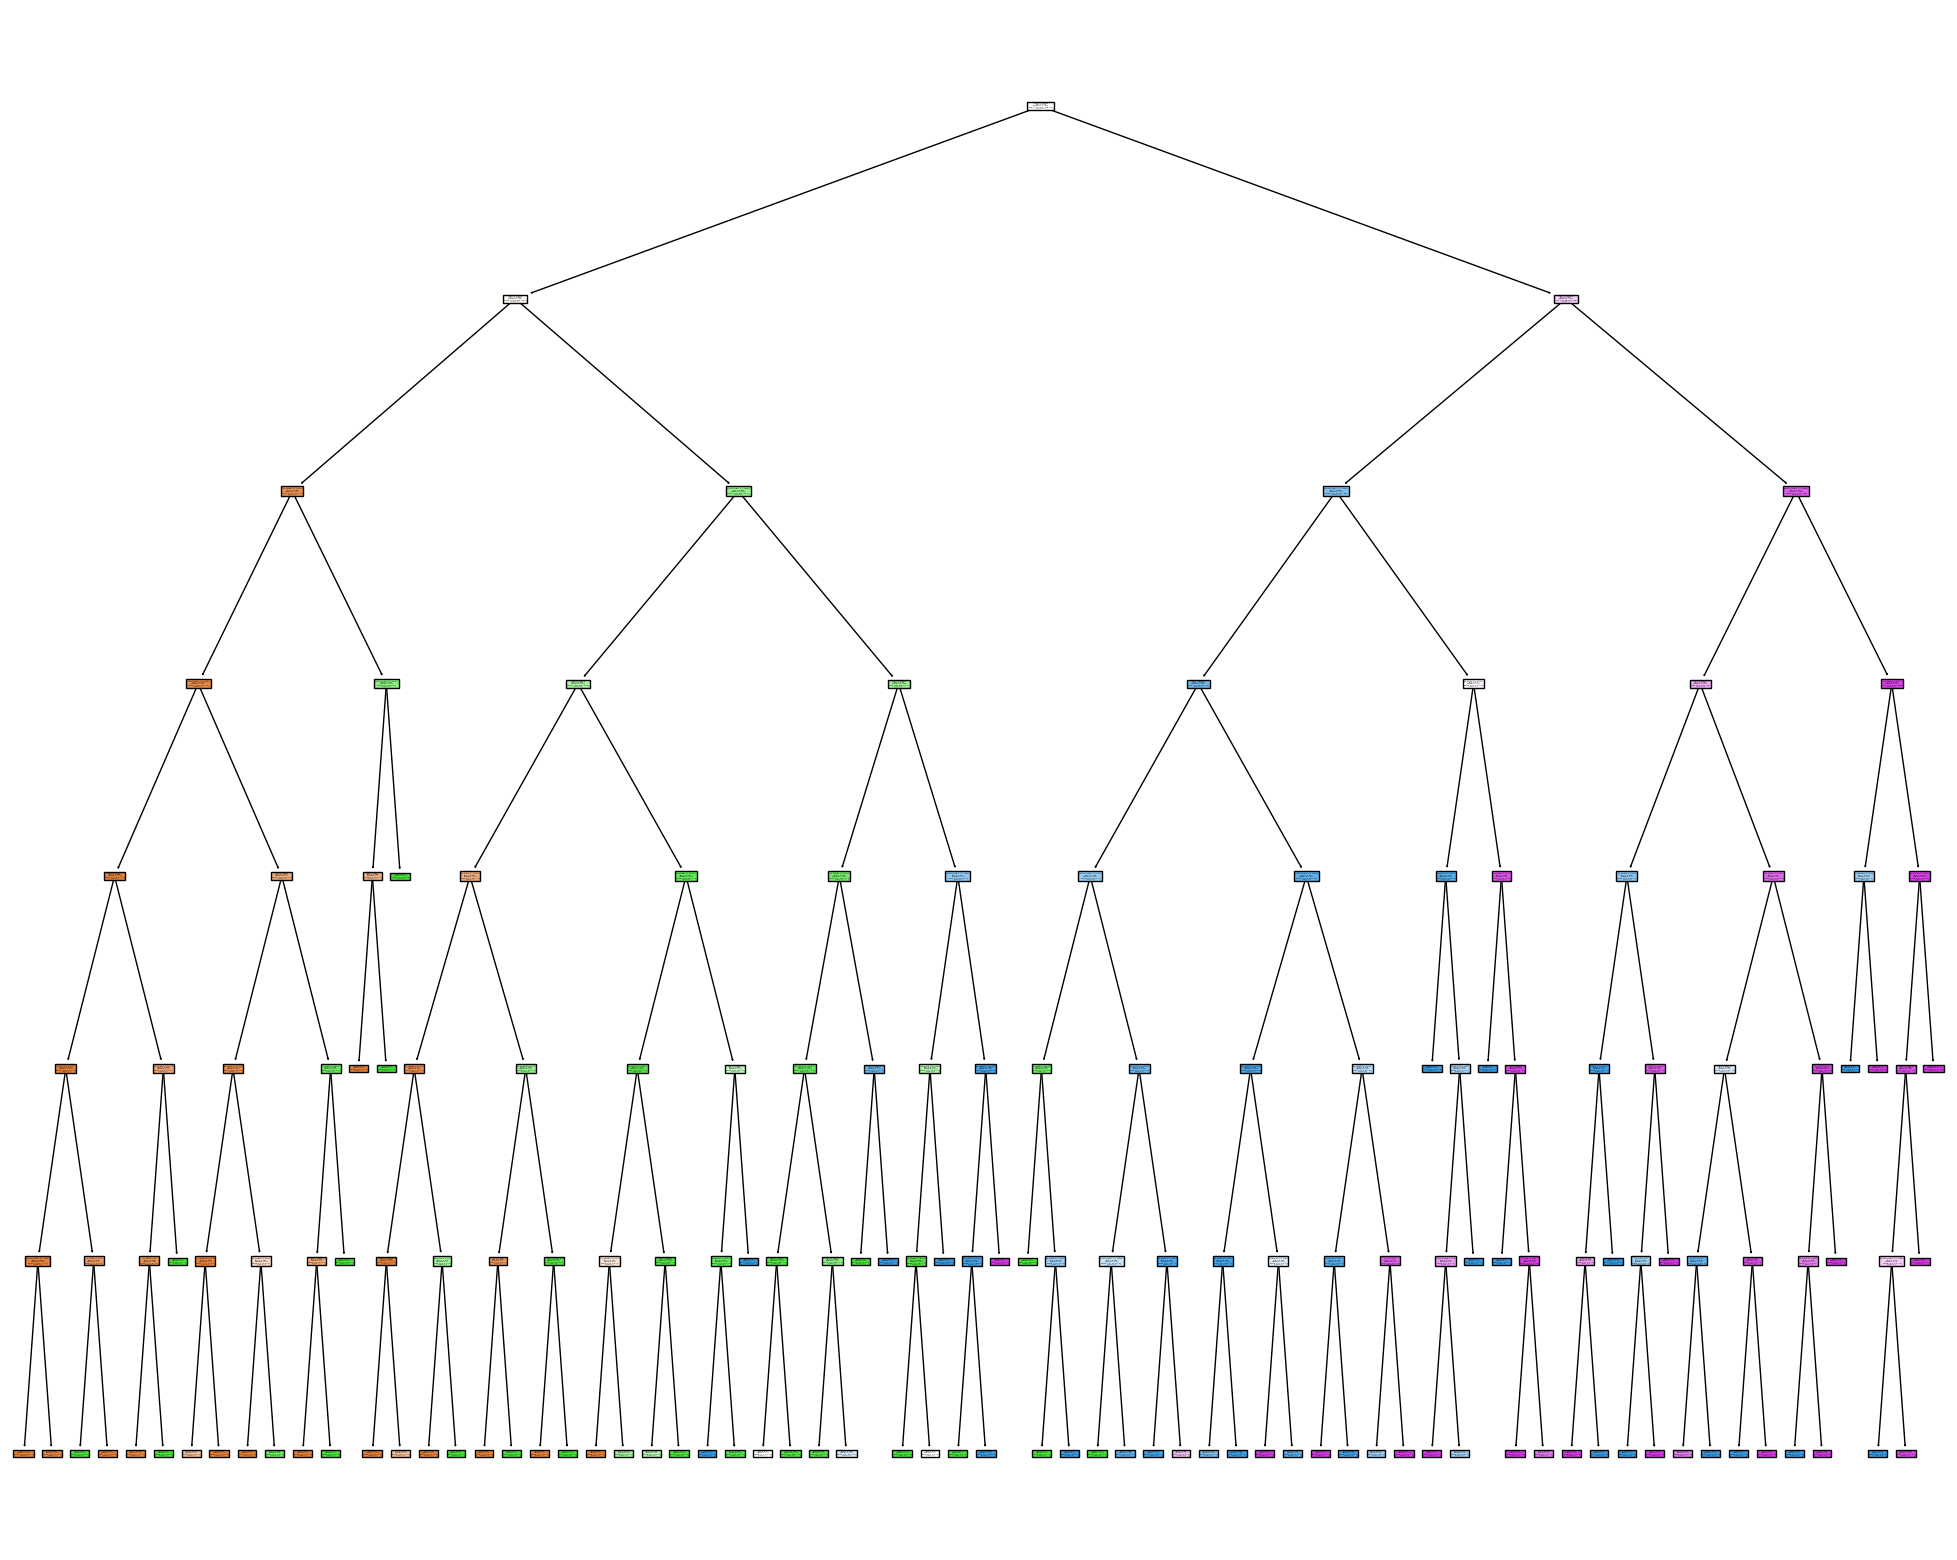

In [91]:
feature_names = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']
target_names = ['1', '2', '3', '4']
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(DT1,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)
plt.show()

In [42]:
### Decision tree  by 'entropy' method 
#  with variable amount for 'test size' and 'max depth' to choose better one


def DT2(X,y,Testsize, max_depth):
    df1_evaluation=pd.DataFrame()
    for x in Testsize:
        X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = x , random_state =0)
        for m_depth in max_depth:
            DT2 = DecisionTreeClassifier(criterion="entropy", max_depth = m_depth)
            DT2.fit(X_train,y_train)
            y_pred = DT2.predict (X_test)
            dict={"Test_size":x, "Max_depth":m_depth, "Accuracy":metrics.accuracy_score(y_test, y_pred), "score":DT2.score(X,y)}
            df1_evaluation = df1_evaluation.append(dict, ignore_index=True)
    return (df1_evaluation)

def highlight_max(s):
    is_max = s == s.max()
    return ["background-color: yellow" if v else '' for v in is_max]

In [43]:
df1_evaluation = DT2(X,y,[.1, .15, .2, .25, .3], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
df1_evaluation.style.apply(highlight_max)

,Test_size,Max_depth,Accuracy,score
0,0.100000,1.000000,0.550000,0.500000
1,0.100000,2.000000,0.735000,0.763764
2,0.100000,3.000000,0.735000,0.763764
3,0.100000,4.000000,0.795000,0.835836
4,0.100000,5.000000,0.810000,0.872873
5,0.100000,6.000000,0.870000,0.916416
6,0.100000,7.000000,0.890000,0.950450
7,0.100000,8.000000,0.915000,0.976476
8,0.100000,9.000000,0.905000,0.984484
9,0.100000,10.000000,0.910000,0.989489


In [44]:
### 'test size' = 0.10 and 'max depth' = 8 has the best accuracy (0.915)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10,random_state=0)
DT3 = DecisionTreeClassifier(criterion="entropy", max_depth=8)
DT3 = DT3.fit(X_train,y_train)
y_pred = DT3.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.91


In [45]:
from sklearn import tree
text_representation = tree.export_text(DT3)
print(text_representation)

|--- feature_13 <= 2235.50
|   |--- feature_13 <= 1106.00
|   |   |--- feature_11 <= 1231.50
|   |   |   |--- feature_0 <= 1619.50
|   |   |   |   |--- feature_11 <= 823.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_11 >  823.50
|   |   |   |   |   |--- feature_13 <= 852.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_13 >  852.50
|   |   |   |   |   |   |--- feature_0 <= 996.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  996.00
|   |   |   |   |   |   |   |--- feature_4 <= 7.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_4 >  7.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  1619.50
|   |   |   |   |--- feature_13 <= 824.00
|   |   |   |   |   |--- feature_11 <= 719.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_11 >  719.00
|   |   |   |   |   |   |--- feature_12 <= 1691.50
|   |   |   |   |   |   | 

In [46]:
### evaluation for both Decisioin tree model

In [47]:
confusion_matrix(y, DT1.predict(X))

array([[484,  16,   0,   0],
       [ 11, 452,  36,   0],
       [  0,  18, 465,  17],
       [  0,   0,  22, 477]], dtype=int64)

In [48]:
print(classification_report(y, DT1.predict(X)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       500
           1       0.93      0.91      0.92       499
           2       0.89      0.93      0.91       500
           3       0.97      0.96      0.96       499

    accuracy                           0.94      1998
   macro avg       0.94      0.94      0.94      1998
weighted avg       0.94      0.94      0.94      1998



In [49]:
confusion_matrix(y, DT3.predict(X))

array([[492,   8,   0,   0],
       [  6, 488,   5,   0],
       [  0,  18, 476,   6],
       [  0,   0,   5, 494]], dtype=int64)

In [50]:
print(classification_report(y, DT3.predict(X)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       500
           1       0.95      0.98      0.96       499
           2       0.98      0.95      0.97       500
           3       0.99      0.99      0.99       499

    accuracy                           0.98      1998
   macro avg       0.98      0.98      0.98      1998
weighted avg       0.98      0.98      0.98      1998



In [51]:
###   Random Forest
#  with variable amount for 'test size' and 'max depth' and 'n_estimator' to choose better one


def RF(X,y,Testsize,max_depth,n_estimators):
    df1_evaluation=pd.DataFrame()
    for x in Testsize:
        X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = x , random_state =0)
        for m_depth in max_depth:
            for  n_estim in n_estimators :
                RF = RandomForestClassifier(n_estimators=n_estim,max_depth=m_depth)
                RF.fit(X_train,y_train)
                y_pred = RF.predict (X_test)
                dict={'Test_size':x, "Max_depth":m_depth,"n_estimator":n_estim, "Accuracy":metrics.accuracy_score(y_test, y_pred), "score":RF.score(X,y)}
                df1_evaluation = df1_evaluation.append(dict, ignore_index=True)
    return (df1_evaluation)
def highlight_max(s):
    is_max =s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [52]:
df1_evaluation = RF(X,y,[.1, .15, .2, .25, .3], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], [100,200])
df1_evaluation.style.apply(highlight_max)

,Test_size,Max_depth,n_estimator,Accuracy,score
0,0.100000,1.000000,100.000000,0.670000,0.619119
1,0.100000,1.000000,200.000000,0.655000,0.627127
2,0.100000,2.000000,100.000000,0.745000,0.773774
3,0.100000,2.000000,200.000000,0.795000,0.791291
4,0.100000,3.000000,100.000000,0.835000,0.847848
5,0.100000,3.000000,200.000000,0.855000,0.853854
6,0.100000,4.000000,100.000000,0.865000,0.881882
7,0.100000,4.000000,200.000000,0.860000,0.873874
8,0.100000,5.000000,100.000000,0.850000,0.902402
9,0.100000,5.000000,200.000000,0.870000,0.905906


In [53]:
## test size' = 0.15 and 'max depth' = 12 and 'n_estimators' = 200 has the best accuracy (0.91)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=0)
RF1 = RandomForestClassifier(n_estimators=200, max_depth=12)
RF1 = RF1.fit(X_train,y_train)
y_pred = RF1.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.91


In [54]:
confusion_matrix(y, RF1.predict(X))

array([[497,   3,   0,   0],
       [  5, 490,   4,   0],
       [  0,   5, 491,   4],
       [  0,   0,   6, 493]], dtype=int64)

In [55]:
print(classification_report(y, RF1.predict(X)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.98      0.98      0.98       499
           2       0.98      0.98      0.98       500
           3       0.99      0.99      0.99       499

    accuracy                           0.99      1998
   macro avg       0.99      0.99      0.99      1998
weighted avg       0.99      0.99      0.99      1998



In [56]:
###   SVM
#  with variable amount for 'test size' to choose better one


def SVM(X,y,Testsize):
    df1_evaluation=pd.DataFrame()
    for x in Testsize:
        X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = x , random_state =0)
        SVM = SVC()
        SVM.fit(X_train,y_train)
        y_pred = SVM.predict (X_test)
        dict={'Test_size':x, "Accuracy":metrics.accuracy_score(y_test, y_pred), "score":SVM.score(X,y)}
        df1_evaluation = df1_evaluation.append(dict, ignore_index=True)
    return (df1_evaluation)
def highlight_max(s):
    is_max=s==s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [57]:
df1_evaluation = SVM(X,y,[.1, .15, .2, .25, .3])
df1_evaluation.style.apply(highlight_max)

,Test_size,Accuracy,score
0,0.100000,0.950000,0.953954
1,0.150000,0.953333,0.952452
2,0.200000,0.952500,0.948949
3,0.250000,0.944000,0.951952
4,0.300000,0.945000,0.950951


In [58]:
### test size = 0.15 is the best accuracy (0.95)
### kernel type : rbf

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=0)
SVM_rbf = SVC(kernel='rbf')
SVM_rbf = SVM_rbf.fit(X_train,y_train)
y_pred = SVM_rbf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9533333333333334


In [59]:
### kernel type : poly

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=0)
SVM_poly = SVC(kernel='poly')
SVM_poly = SVM_poly.fit(X_train,y_train)
y_pred = SVM_poly.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9566666666666667


In [60]:
### kernel type : sigmoid

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=0)
SVM_sig = SVC(kernel='sigmoid')
SVM_sig = SVM_sig.fit(X_train,y_train)
y_pred = SVM_sig.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.21666666666666667


In [61]:
### kernel type : linear

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=0)
SVM_lin = SVC(kernel='linear')
SVM_lin = SVM_lin.fit(X_train,y_train)
y_pred = SVM_lin.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9766666666666667


In [62]:
###  SVM model by linear kernel type has the best accuracy (0.976)

In [63]:
confusion_matrix(y, SVM_lin.predict(X))

array([[499,   1,   0,   0],
       [  2, 490,   7,   0],
       [  0,   2, 493,   5],
       [  0,   0,   5, 494]], dtype=int64)

In [64]:
print(classification_report(y, SVM_lin.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       0.99      0.98      0.99       499
           2       0.98      0.99      0.98       500
           3       0.99      0.99      0.99       499

    accuracy                           0.99      1998
   macro avg       0.99      0.99      0.99      1998
weighted avg       0.99      0.99      0.99      1998



In [65]:
### after comparing evalutiona of these 3 algorithms, "SVM" 'kernel type=linear' was the best model

In [66]:
###     prediction for test DataFrame  #####

In [67]:
data_test = pd.read_csv ("E:/ML course/4- ML/Data/30- classification P. 2/test.csv")      ### Calling test Data
data_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [68]:
data_test1 = pd.DataFrame(data_test)                    ### making Dataframe
data_test1

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [69]:
### I think it is better that check this data in  features and missing value

In [70]:
### there are a columns 'id' which we dont have this in our origin data
### so it should be deleted

data_test2 = data_test1.drop(["id"], axis=1)
data_test2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [71]:
data_test2.isnull().sum()           ### no missing value

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [72]:
data_test2.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [73]:
### we should apply the changes on test data as the same as applied on data

In [74]:
### px_height

data_test2[data_test2["px_height"]==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
420,986,0,2.8,0,0,1,26,0.1,80,8,9,0,1214,1316,7,5,8,1,0,0
819,1992,1,1.3,1,8,1,43,1.0,153,5,15,0,883,2179,7,6,20,1,1,0


In [75]:
data_test3 = data_test2.drop(index=[420, 819])     # incorect value was deleted

In [76]:
### sc_w

data_test3[data_test3["sc_w"]==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
9,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1
13,1190,1,2.2,1,5,0,19,0.9,158,5,15,227,1856,992,13,0,16,1,1,0
19,1488,0,2.6,0,9,0,37,0.7,189,4,20,47,559,2524,5,0,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,1517,1,2.2,1,11,0,19,0.3,179,2,16,291,1592,1972,11,0,13,0,0,1
958,1066,1,0.9,0,4,0,43,0.4,101,6,11,876,880,3856,14,0,6,1,0,1
973,1796,1,0.5,0,0,0,44,0.2,169,4,4,841,1803,1378,12,0,13,1,0,1
987,905,0,1.9,1,11,1,12,0.7,173,7,12,410,1021,852,19,0,3,1,1,0


In [77]:
data_test3["sc_w"][data_test3["sc_w"] < 2.54] = 2.54

In [78]:
data_test3.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,1248.028056,0.516032,1.539880,0.517034,4.594188,0.485972,33.650301,0.517435,139.557114,4.323647,10.050100,628.377756,1240.157315,2139.782565,12.005010,5.811343,11.079158,0.755511,0.500000,0.508016
std,432.170674,0.499993,0.829105,0.499960,4.464127,0.500054,18.142834,0.280415,34.832890,2.287391,6.099106,432.450690,439.965762,1088.870164,4.319136,3.744531,5.495028,0.429999,0.500251,0.500186
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,2.000000,501.000000,263.000000,5.000000,2.540000,2.000000,0.000000,0.000000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,110.000000,2.000000,5.000000,265.750000,831.250000,1235.750000,8.000000,2.540000,6.250000,1.000000,0.000000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.000000,4.000000,10.000000,565.000000,1251.500000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.500000,1.000000
75%,1629.000000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.000000,6.000000,16.000000,905.000000,1639.250000,3066.500000,16.000000,8.000000,16.000000,1.000000,1.000000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [79]:
# add test data to data frame

Df = df1.append(data_test3)
Df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7.00,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3.00,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2.54,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8.00,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2.54,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8.00,15,1,1,0,NaN
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,2.54,19,0,1,1,NaN
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,2.54,14,1,0,0,NaN
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11.00,6,0,1,0,NaN


In [80]:
#define train and test

train=Df.iloc[:1998]
test= Df.iloc[1998:]

In [81]:
x_train= Df[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']][:1998]
y_train=Df['price_range'][:1998].values.reshape(-1,1)

In [82]:
x_test = Df[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']][1998:]

In [83]:
SVM_lin.fit(x_train,y_train)
y_pred = SVM_lin.predict(x_test)
y_pred

array([3., 3., 2., 3., 1., 3., 3., 1., 3., 0., 3., 3., 0., 0., 2., 0., 2.,
       1., 3., 2., 1., 3., 1., 1., 3., 0., 2., 0., 3., 0., 2., 0., 3., 0.,
       0., 1., 3., 1., 2., 1., 1., 2., 0., 0., 0., 1., 0., 3., 1., 2., 1.,
       0., 2., 0., 3., 1., 3., 1., 1., 3., 3., 3., 0., 1., 1., 1., 2., 3.,
       1., 2., 1., 2., 2., 3., 3., 0., 2., 0., 1., 3., 0., 3., 3., 0., 3.,
       0., 3., 1., 3., 0., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 0.,
       0., 3., 0., 2., 0., 1., 2., 3., 3., 3., 1., 3., 3., 3., 3., 2., 3.,
       0., 0., 3., 2., 1., 2., 0., 3., 2., 2., 2., 0., 2., 2., 1., 3., 1.,
       1., 0., 3., 2., 1., 2., 1., 3., 2., 3., 3., 3., 2., 3., 2., 3., 1.,
       0., 3., 2., 3., 3., 3., 3., 2., 2., 3., 3., 3., 3., 1., 0., 3., 0.,
       0., 0., 2., 1., 0., 1., 0., 0., 1., 2., 1., 0., 0., 1., 1., 2., 2.,
       1., 0., 0., 0., 1., 0., 3., 1., 0., 2., 2., 2., 3., 1., 1., 3., 2.,
       3., 2., 2., 1., 1., 0., 1., 2., 0., 2., 3., 3., 0., 2., 0., 3., 2.,
       3., 3., 1., 0., 1.

In [84]:
data_test3['price_range']=y_pred
data_test3

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7.00,2,0,1,0,3.0
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,2.54,7,1,0,0,3.0
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10.00,10,0,1,1,2.0
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,2.54,7,1,1,0,3.0
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8.00,7,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8.00,15,1,1,0,2.0
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,2.54,19,0,1,1,1.0
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,2.54,14,1,0,0,0.0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11.00,6,0,1,0,2.0
